# Phase 1 — Data Exploration

## 1️⃣ Dataset Goal & Source

**Goal:**  
This dataset is designed for a **classification task**, where the goal is to predict the **disease (prognosis)** from a set of binary **symptom indicators**.  
Each column (except the target) represents a specific symptom, with values 1 if present and 0 if absent.

**Purpose:**  
To train a machine learning model that can identify diseases based on reported symptoms, forming the basis of a health advice system.

**Dataset Source:**  
[https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning](https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning)



## 2️⃣ General Information

The dataset contains a collection of symptom indicators (0/1) for various diseases.  
Each row represents a patient case, while each column represents a symptom.  
The final column, `prognosis`, indicates the diagnosed disease (the target class).

We'll now explore the dataset to understand its shape, structure, and basic properties.


In [2]:
import pandas as pd


df = pd.read_csv('Data.csv')


df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


print("Shape (rows, columns):", df.shape)
print("\nData types summary:\n", df.dtypes.value_counts())
print("\nTarget variable:", "prognosis")
print("\nUnique diseases:", df['prognosis'].nunique())
df.head()


Shape (rows, columns): (4920, 133)

Data types summary:
 int64     132
object      1
Name: count, dtype: int64

Target variable: prognosis

Unique diseases: 41


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## 3️⃣ Summary & Visualization

We perform statistical and visual exploration to understand the dataset’s characteristics:  
- **Statistical summaries:** Mean and variance for binary symptom columns.  
- **Visualization:** Distribution of diseases and most common symptoms.  
- **Missing value analysis:** Check for null or missing entries.  
- **Class imbalance:** Evaluate if some diseases dominate the dataset.


📊 Statistical Summary (percentage for first 10 symptoms):



,Mean (%),Std (%)
fatigue,39.27%,48.84%
vomiting,38.90%,48.76%
high_fever,27.68%,44.75%
loss_of_appetite,23.41%,42.35%
nausea,23.29%,42.27%
headache,23.05%,42.12%
abdominal_pain,20.98%,40.72%
yellowish_skin,18.54%,38.86%
yellowing_of_eyes,16.59%,37.20%
chills,16.22%,36.87%



Missing values per column: 0


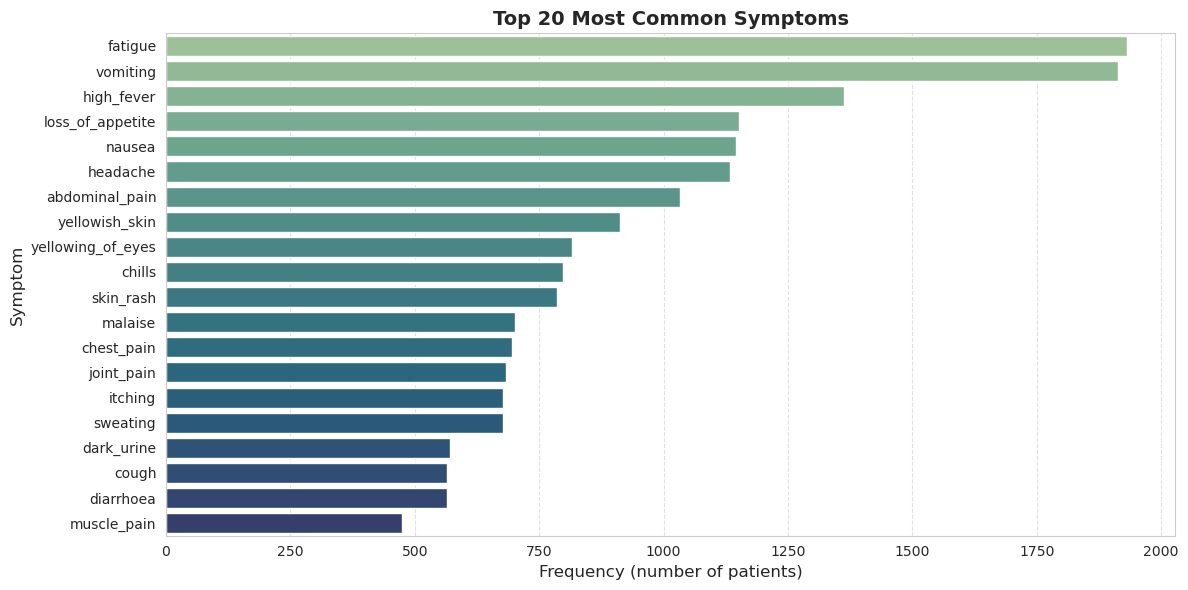

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

symptom_cols = [c for c in df.columns if c != 'prognosis']

mean_values = df[symptom_cols].mean() * 100
std_values = df[symptom_cols].std() * 100

summary_table = pd.DataFrame({
    'Mean (%)': mean_values.round(2),
    'Std (%)': std_values.round(2)
}).sort_values('Mean (%)', ascending=False)

print("📊 Statistical Summary (percentage for first 10 symptoms):\n")
display(summary_table.head(10).style.format({'Mean (%)': '{:.2f}%', 'Std (%)': '{:.2f}%'}).background_gradient(cmap='Blues'))


print("\nMissing values per column:", df.isnull().sum().sum())


sns.set_style("whitegrid")
sns.set_palette("crest")


symptom_counts = df[symptom_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=symptom_counts.values[:20],
    y=symptom_counts.index[:20],
    palette='crest'
)
plt.title('Top 20 Most Common Symptoms', fontsize=14, weight='bold')
plt.xlabel('Frequency (number of patients)', fontsize=12)
plt.ylabel('Symptom', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 4️⃣ Preprocessing Techniques

To prepare the dataset for modeling, we applied the following preprocessing steps:

1. **Column cleanup:** Removed empty or unnamed columns.  
2. **Missing values:** Checked and replaced missing values with 0 (symptom not present).  
3. **Encoding:** Symptoms already numeric (0/1), so no encoding needed.  
4. **Normalization:** Not required for binary features.  
5. **Saving cleaned data:** Exported a cleaned CSV for later phases.


In [10]:

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


df.fillna(0, inplace=True)


binary_check = df.drop('prognosis', axis=1).apply(lambda x: x.isin([0,1]).all())
print("All features are binary (0/1):", binary_check.all())


df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved successfully.")


All features are binary (0/1): True
Cleaned dataset saved successfully.
